In [1]:
# read in data
import pandas as pd
df = pd.read_csv('mbti_1.csv')

In [2]:
df

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
...,...,...
8670,ISFP,'https://www.youtube.com/watch?v=t8edHB_h908||...
8671,ENFP,'So...if this thread already exists someplace ...
8672,INTP,'So many questions when i do these things. I ...
8673,INFP,'I am very conflicted right now when it comes ...


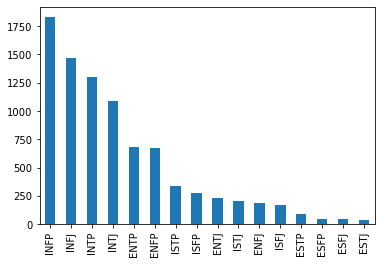

In [3]:
import matplotlib.pyplot as plt

df['type'].value_counts().plot(kind='bar')
plt.show()

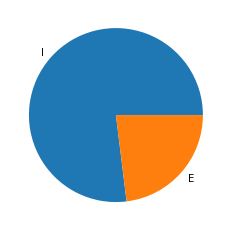

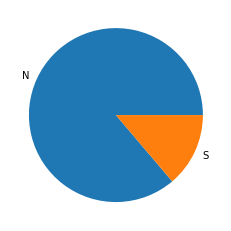

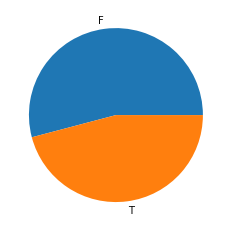

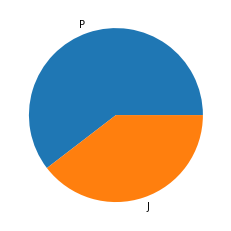

In [4]:
for i in range(4):
    types = [t[i] for t in df['type']]
    pd.Series(types).value_counts().plot(kind='pie', label="")
    plt.show()

In [5]:
import numpy as np

# break up each row into its constituent sentences
# drop any row that has more than 50 sentences (these often have ||||||| in them)
l = df['posts'].values.tolist()
targets = df['type'].values.tolist()
new_list_1 = [x.split('|||') for x in l]

for i in range(len(new_list_1)):
    new_list_1[i].insert(0, targets[i])
    
new_list = [x for x in new_list_1 if len(x) <= 51]
df_mbti = pd.DataFrame(new_list)


In [6]:
df_mbti.head()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw,http://41.media.tumblr.com/tumblr_lfouy03PMA1q...,enfp and intj moments https://www.youtube.com...,What has been the most life-changing experienc...,http://www.youtube.com/watch?v=vXZeYwwRDw8 h...,May the PerC Experience immerse you.,The last thing my INFJ friend posted on his fa...,Hello ENFJ7. Sorry to hear of your distress. I...,84389 84390 http://wallpaperpassion.com/uplo...,...,http://www.serebii.net/potw-dp/Scizor.jpg,Not all artists are artists because they draw....,"Welcome to the robot ranks, person who downed ...",Banned for taking all the room under my bed. Y...,http://www.youtube.com/watch?v=w8IgImn57aQ,"Banned for being too much of a thundering, gru...",Ahh... old high school music I haven't heard i...,I failed a public speaking class a few years a...,I like this person's mentality. He's a confirm...,Move to the Denver area and start a new life f...
1,ENTP,'I'm finding the lack of me in these posts ver...,Sex can be boring if it's in the same position...,Giving new meaning to 'Game' theory.,Hello *ENTP Grin* That's all it takes. Than w...,This + Lack of Balance and Hand Eye Coordination.,Real IQ test I score 127. Internet IQ tests ar...,You know you're an ENTP when you vanish from a...,http://img188.imageshack.us/img188/6422/6020d1...,http://img.adultdvdtalk.com/813a0c6243814cab84c51,...,Because its hard to be sad about losing someon...,"Oh, you don't have to tell me that most of the...",:D I'm a Nightowl. I wake up between 6-7pm and...,Personal opinion backed by theory would sugges...,Personal stocks that I have on my desktop that...,I'll tell you when I open photoshop. :) Glad ...,:D Thanks.,http://i817.photobucket.com/albums/zz96/kamioo...,:) Static: http://i817.photobucket.com/albums/...,Psychologist don't keep me around long enough ...
2,INTP,'Good one _____ https://www.youtube.com/wat...,"Of course, to which I say I know; that's my bl...",Does being absolutely positive that you and yo...,"No, I didn't; thank you for a link!",So-called Ti-Si loop (and it can stem from any...,Have you noticed how peculiar vegetation can b...,The Smiths – Never Had No One Ever,I often find myself spotting faces on marble t...,This 5 year-old sentence is an incredibly accu...,...,That happens. And it occurs because most often...,246386,"I study graphic design now, which I really enj...",Alexxxandra97 - DeviantArt,236994,http://www.youtube.com/watch?v=2Nkcn8m9M0M,I am always ready to discipline (to intimidate...,World domination? Shooting people in the head?...,218106,ISTP? http://www.youtube.com/watch?v=7ghqoYx...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...","Dear ENTJ sub, Long time no see. Sincerely,...",None of them. All other types hurt in deep exi...,Probably a sliding scale that depends on indiv...,Draco Malfoy also. I'd say he's either 358 or ...,"I'm either 358 or 385, though in which stackin...",I'm not particularly introverted or extraverte...,"Dear Type 9 INFP, Your absolute admiration of...",2% still means about 1/50 people. I've probabl...,...,"I wanted to come up with something clever, but...",So then why do you even bother asking if you'v...,Wasn't sure I listened to sx music until now. ...,INFP messaged me with a picture of herself bef...,"Either way, you see my point. The actual rarit...",WOW my math was off! I literally just said num...,Rarity in the context of the entire planet is ...,One could say that whatever the culmination of...,"I would agree, however, those that profess to ...",Lol.'
4,ENTJ,'You're fired.,That's another silly misconception. That appro...,But guys... he REALLY wants to go on a super-d...,Never mind. Just go on permanent vacation.,Two months? I wouldn't be crazy about the idea...,Lol. Its not like our views were unsolicited. ...,Sometimes I just really like impoverished rap ...,I probably would have lost it too. His stonewa...,I would have just taken the project and gave t

In [13]:
import numpy as np
import re
import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
%matplotlib inline
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anfang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# data preprocess
# data preprocess
stemmer = nltk.PorterStemmer()
stopword = set(stopwords.words('english'))
import string

def data_preprocess(review):
    review = re.sub(r"http\S+", '', review) # remove url
    review = re.sub(r'^\s+|\s+?$','',review) # remove leading and trailing whitespace
    review = re.sub(r'@[\w\-]+', '', review) # remove mentions
    review = re.sub(r'RT[\s]+', '', review) #remove retweet text 'RT'
    review = re.sub('[^a-zA-Z]',' ',review)#replace non-character with space
    review = review.lower() #lower the text
    review = re.sub('\[.*?\]', '', review)
    #review = re.sub('https?://\S+|www\.\S+', '', review)
    review = re.sub(r'#', '', review) # remove hashtags
    review = re.sub('[%s]' % re.escape(string.punctuation), '', review) # remove escape characters
    review = re.sub('\n', '', review)
    review = re.sub('\w*\d\w*', '', review)
    review = [word for word in review.split(' ') if word not in stopword and word not in string.punctuation] #remove stopwords and punctuations and tokenize
    review=" ".join(review)
    review = [stemmer.stem(word) for word in review.split(' ')] #use PorterStemmer
    
    review=" ".join(review)
    return review


In [15]:
new_list_2 = [x.split('|||') for x in l]

for i in range(len(new_list_2)):
    temp = []
    for j in new_list_2[i]:
        processed_post = data_preprocess(j)
        if processed_post != "":
            temp.append(processed_post)
    new_list_2[i] = temp
    new_list_2[i].insert(0, targets[i])
    
new_list_processed = [x for x in new_list_2 if len(x) <= 51]
df_mbti_processed = pd.DataFrame(new_list_processed)

In [17]:
df_mbti_processed

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,INFJ,enfp intj moment sportscent top ten play prank,life chang experi life,repeat today,may perc experi immers,last thing infj friend post facebook commit su...,hello enfj sorri hear distress natur relations...,welcom stuff,game set match,prozac wellbrutin least thirti minut move leg ...,...,None,None,None,None,None,None,None,None,None,None
1,ENTP,find lack post alarm,sex bore posit often exampl girlfriend current...,give new mean game theori,hello entp grin take convers flirt acknowledg ...,lack balanc hand eye coordin,real iq test score internet iq test funni scor...,know entp vanish site year half return find pe...,think thing sometim go old sherlock holm quot ...,cheshirewolf tumblr com,...,person stock desktop download random stock sit...,tell open photoshop glad like static,thank,made friend sever hour work construct everi line,static get avatar later one fellow teammat,psychologist keep around long enough diagnosi ...,None,None,None,None
2,INTP,good one,cours say know bless curs,absolut posit best friend could amaz coupl cou...,thank link,call ti si loop stem current topic obsess dead...,notic peculiar veget look grass dozen differ p...,smith never one ever,often find spot face marbl tile wood,year old sentenc incred accur beauti descript,...,istp,None,None,None,None,None,None,None,None,None
3,INTJ,dear intp enjoy convers day esoter gab natur u...,dear entj sub long time see sincer alpha,none type hurt deep existenti way want part,probabl slide scale depend individu prefer lik...,draco malfoy also say either,either though stack somewhat arbitrari distinc...,particularli introvert extravert person said w...,dear type infp absolut admir refresh great gir...,still mean peopl probabl seen other today neve...,...,want come someth clever almost would give lot sex,even bother ask alreadi made mind extravert in...,sure listen sx music,infp messag pictur go bed ask say goodnight as...,either way see point actual rariti skew make t...,wow math liter said number see glorifi type ev...,rariti context entir planet somewhat silli eve...,one could say whatev culmin action throughout ...,would agre howev profess know type state anyth...,lol
4,ENTJ,fire,anoth silli misconcept approach logic go key u...,guy realli want go super duper long ass vacat ...,never mind go perman vacat,two month crazi idea realli best employe may c...,lol like view unsolicit victim,sometim realli like impoverish rap music,probabl would lost stonewal insignific idiot s...,would taken project gave someth later,...,would ask op ask ambigu question would go what...,good vs bad good vs evil one object posit vs n...,think sure idiot also think peopl went way fuc...,realli reeeeeeaaallli hate rigidli pc thumb su...,think peopl need get skin even peopl wrong rac...,tri condescend tell thing mention peopl say wr...,breviti post take much refut acknowledg peopl ...,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8611,ISFP,ixfp alway think cat fi dom reason,especi websit becom neo nazi perc,nerd learn dutch duolingo much fun,duolingo shit oh god love xd,right winger lack polit conscious,doubt real hope hell noth like twilight vampir,would agre like relat confid level make sens s...,nazi germani soviet union extrem nationalist t...,one plenti infp right wing conserv alt reich f...,...,pretti stupid interest talk much lot peopl hea...,although disagre said multicultur assum unders...,think right say end goal multicultur would agr...,cours allow sex white peopl otherwis sjw liber...,white children contribut white genocid,also moder even mean chang depend context poli...,None,None,None,None
8612,ENFP,thread alreadi exist someplac els heck delet one,ooop guess look hard start movi everi enfp wat...,came know enfp thread go done list film enfp r...,know like,choos feed joy beat buddi wakefield,quot pucca never seen shock quot neither guess...,hilari hahaha use pretend

In [25]:
# train_test_split for processed_data
from sklearn.model_selection import train_test_split

text_X_train, text_X_test, text_y_train, text_y_test = train_test_split(df_mbti.drop(columns=[0]),
                                                    df_mbti[0],
                                                    test_size = 0.2,
                                                    random_state = 123)

# reshape train data so each sentence is on its own row, remove Nones
text_X_train = text_X_train.to_numpy().reshape(-1,1)
text_y_train = np.c_[[text_y_train for i in range(50)]].T.reshape(-1,1)
text_train_data = np.c_[text_y_train, text_X_train]
text_train_data = text_train_data[text_train_data[:,1] != None]

text_X_test = text_X_test.to_numpy().reshape(-1,1)
text_y_test = np.c_[[text_y_test for i in range(50)]].T.reshape(-1,1)
text_test_data = np.c_[text_y_test, text_X_test]
text_test_data = text_test_data[text_test_data[:,1] != None]

In [27]:
text_test_data

array([['ISFP',
        "Now that you mention it, I see a lot of Christian Grey style ENTJ-ness in Narcisse (I'm pretty sure Anastasia was also an INFJ). Their overall relationship quite reminds me of Fifty Shades, which is..."],
       ['ISFP',
        "I'm a high school senior so don't judge me! I get to school like an hour early and I head to the art room but it's locked so I knock on the office door to see if the teacher's inside. My teacher..."],
       ['ISFP',
        "Definitely ENTP! Don't over think this. It takes one to know one."],
       ...,
       ['INTP',
        "Not yet. I could do it. But I most match with Ne and Se what just can't work. .-."],
       ['INTP', "I've read very much about it. xD"],
       ['INTP',
        "At first I thoght I'm an ISTJ, but I'm not sure anymore. But there is so much N. I'm very creative, esspecially when writing music. I have soo many ideas for covers when I'm listening to music. I...'"]],
      dtype=object)

In [28]:
len(text_test_data)

83466

In [18]:
# train_test_split for raw_data
from sklearn.model_selection import train_test_split

text_X_train1, text_X_test1, text_y_train1, text_y_test1 = train_test_split(df_mbti_processed.drop(columns=[0]),
                                                    df_mbti_processed[0],
                                                    test_size = 0.2,
                                                    random_state = 123)

# reshape train data so each sentence is on its own row, remove Nones
text_X_train1 = text_X_train1.to_numpy().reshape(-1,1)
text_y_train1 = np.c_[[text_y_train1 for i in range(50)]].T.reshape(-1,1)
text_train_data1 = np.c_[text_y_train1, text_X_train1]
text_train_data1 = text_train_data1[text_train_data1[:,1] != None]

text_X_test1 = text_X_test1.to_numpy().reshape(-1,1)
text_y_test1 = np.c_[[text_y_test1 for i in range(50)]].T.reshape(-1,1)
text_test_data1 = np.c_[text_y_test1, text_X_test1]
text_test_data1 = text_test_data1[text_test_data1[:,1] != None]

In [29]:
text_test_data1

array([['INFP',
        'think lost comfort level post pc bit guess time hang lol probabl express feel pretti disconnect'],
       ['INFP', 'care bother fuck'],
       ['INFP',
        'open idea scientist say like way dimens typic think live extrem minut effect'],
       ...,
       ['INTJ',
        'thank kind word dude yeah lol believ one snatch name yet figur type right hand man stage coup'],
       ['INTJ',
        'hey troubl look person qualiti object best insight often come observ honest go'],
       ['INTJ', 'sure allow bump still confus type would like input']],
      dtype=object)

In [30]:
len(text_test_data1)

80556

In [44]:
df = pd.DataFrame(text_test_data1)
df.rename(columns = {0: "type", 1: "posts"}, inplace = True)
df

,type,posts
0,INFP,think lost comfort level post pc bit guess tim...
1,INFP,care bother fuck
2,INFP,open idea scientist say like way dimens typic ...
3,INFP,thank thread pretti heavi fist pump moment rec...
4,INFP,thread make feel awkward guess environ grew ma...
...,...,...
80551,INTJ,oh also realli sure fe fi like consid consider...
80552,INTJ,quit fine haha probabl get bed anyway sinc liv...
80553,INTJ,thank kind word dude yeah lol believ one snatc...
80554,INTJ,hey troubl look person qualiti object best ins...


(-0.5, 499.5, 399.5, -0.5)

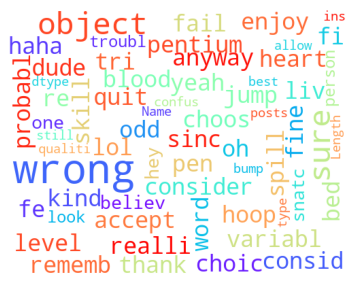

In [48]:
# wordcloud for processed data
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image

# INTJ wordcloud"
wc_INTJ = WordCloud(
    width = 500,
    height = 400,
    random_state = 3,
    collocations = False,
    background_color = 'white',
    colormap = 'rainbow',
    max_words = 200,
    max_font_size = 60,
    #mask = mask
).generate(str(df.loc[df["type"]=="INTJ"].posts))

plt.figure(figsize=(10,5))
plt.imshow(wc_INTJ)
plt.axis("off")

In [31]:
# change label for binary classifer and 16-class classifer
# raw_data
y_test1 = [0 for x in text_test_data[:,0]]
y_test2 = [np.zeros(4) for x in text_test_data[:,0]]
for i in range(len(y_test1)):
    if text_test_data[i,0][0] == "I":
        y_test1[i] += 8
        y_test2[i][0] += 1
    if text_test_data[i,0][1] == "S":
        y_test1[i] += 4
        y_test2[i][1] += 1
    if text_test_data[i,0][2] == "T":
        y_test1[i] += 2
        y_test2[i][2] += 1
    if text_test_data[i,0][3] == "P":
        y_test1[i] += 1
        y_test2[i][3] += 1
        
y_train1 = [0 for x in text_train_data[:,0]]
y_train2 = [np.zeros(4) for x in text_train_data[:,0]]
for i in range(len(y_train1)):
    if text_train_data[i,0][0] == "I":
        y_train1[i] += 8
        y_train2[i][0] += 1
    if text_train_data[i,0][1] == "S":
        y_train1[i] += 4
        y_train2[i][1] += 1
    if text_train_data[i,0][2] == "T":
        y_train1[i] += 2
        y_train2[i][2] += 1
    if text_train_data[i,0][3] == "P":
        y_train1[i] += 1
        y_train2[i][3] += 1

y_test2 = np.array(y_test2)
y_train2 = np.array(y_train2)

In [33]:
y_test1_1 = [0 for x in text_test_data1[:,0]]
y_test2_1 = [np.zeros(4) for x in text_test_data1[:,0]]
for i in range(len(y_test1_1)):
    if text_test_data1[i,0][0] == "I":
        y_test1_1[i] += 8
        y_test2_1[i][0] += 1
    if text_test_data1[i,0][1] == "S":
        y_test1_1[i] += 4
        y_test2_1[i][1] += 1
    if text_test_data1[i,0][2] == "T":
        y_test1_1[i] += 2
        y_test2_1[i][2] += 1
    if text_test_data1[i,0][3] == "P":
        y_test1_1[i] += 1
        y_test2_1[i][3] += 1
        
y_train1_1 = [0 for x in text_train_data1[:,0]]
y_train2_1 = [np.zeros(4) for x in text_train_data1[:,0]]

for i in range(len(y_train1_1)):
    if text_train_data1[i,0][0] == "I":
        y_train1_1[i] += 8
        y_train2_1[i][0] += 1
    if text_train_data1[i,0][1] == "S":
        y_train1_1[i] += 4
        y_train2_1[i][1] += 1
    if text_train_data1[i,0][2] == "T":
        y_train1_1[i] += 2
        y_train2_1[i][2] += 1
    if text_train_data1[i,0][3] == "P":
        y_train1_1[i] += 1
        y_train2_1[i][3] += 1

y_test2_1 = np.array(y_test2_1)
y_train2_1 = np.array(y_train2_1)

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [35]:
count_vect = CountVectorizer()
tfidf_transformer = TfidfTransformer()

X_train_counts = count_vect.fit_transform(text_train_data[:,1])
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_new_counts = count_vect.transform(text_test_data[:,1])
X_new_tfidf = tfidf_transformer.transform(X_new_counts)

X_train_counts1 = count_vect.fit_transform(text_train_data1[:,1])
X_train_tfidf1 = tfidf_transformer.fit_transform(X_train_counts1)
X_new_counts1 = count_vect.transform(text_test_data1[:,1])
X_new_tfidf1 = tfidf_transformer.transform(X_new_counts1)

In [37]:
# in the following classifiers
# we only use TF-IDF as features do classification

# different evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

names = ["Naive Bayes", "SVM", "Random Forest", "Decision Tree"]
classifiers = [
    MultinomialNB(),
    SGDClassifier(),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    DecisionTreeClassifier(max_depth=5)
    ]

axis = ["I or E", "N or S", "T or F", "J or P"]
scores = {}
scores1 = {}
for i in range(len(axis)):
    s = []
    s1 = []
    for name, clf in zip(names, classifiers):
        clf.fit(X_train_tfidf, y_train2[:,i])
        pred = clf.predict(X_new_tfidf)
        cm = confusion_matrix(y_test2[:,i], pred)
        s.append(clf.score(X_new_tfidf, y_test2[:,i]))
        
        clf.fit(X_train_tfidf1, y_train2_1[:,i])
        s1.append(clf.score(X_new_tfidf1, y_test2_1[:,i]))
        
    scores[axis[i]] = s
    scores1[axis[i]] = s1


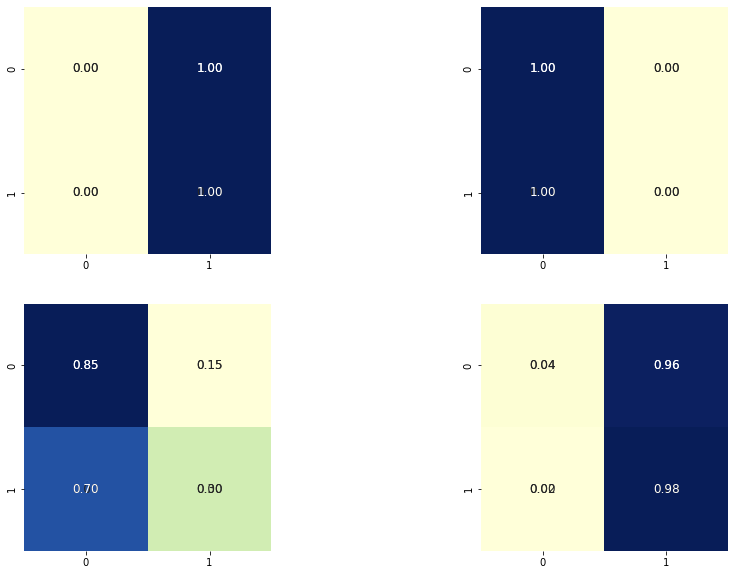

In [54]:
# choose one kind of classifier to see its confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn

clf = MultinomialNB()

for i in range(len(axis)):
    clf.fit(X_train_tfidf, y_train2[:,i])
    pred = clf.predict(X_new_tfidf)
    cm = confusion_matrix(y_test2[:,i], pred)
    matrix_proportions = np.zeros((2,2))
    for j in range(0,2):
        matrix_proportions[j,:] = cm[j,:]/float(cm[j,:].sum())
        confusion_df = pd.DataFrame(matrix_proportions)
        plt.rcParams['figure.figsize'] = [15,10]
        ax = plt.subplot(2, 2, i+1)
        ax = seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')


In [39]:
print("--------raw data--------")
for ax in scores:
    score_lst = [str(i) for i in scores[ax]]
    print (ax + ": " + "\t".join(score_lst))

--------raw data--------
I or E: 0.7524860422207845	0.7531090503917763	0.753144993170872	0.7594110176598855
N or S: 0.852562720149522	0.8527544149713656	0.8527544149713656	0.8527184721922699
T or F: 0.59597920111183	0.5985670812067189	0.5346608199746005	0.5504756427766995
J or P: 0.6133156015623128	0.6192341791867347	0.6113627105647809	0.6254642608966525


In [38]:
print("--------preprocessed data--------")
for ax in scores1:
    score_lst = [str(i) for i in scores1[ax]]
    print (ax + ": " + "\t".join(score_lst))

--------preprocessed data--------
I or E: 0.7702095436714832	0.770991608322161	0.7708922985252495	0.7750881374447589
N or S: 0.8653235016634391	0.8658697055464522	0.8658697055464522	0.8658448780972243
T or F: 0.6089304334872635	0.6050945925815582	0.5372535875664134	0.5576493371071056
J or P: 0.6060132082029892	0.6133497194498237	0.6020284026019167	0.6186627935845871


In [40]:
for a in axis:
    max_i = max(range(len(scores[a])), key=scores[a].__getitem__)
    print("The best performing classifier with raw data for the", a, " axis was\n ", names[max_i], " (", max(scores[a]), ")")

The best performing classifier with raw data for the I or E  axis was
  Decision Tree  ( 0.7594110176598855 )
The best performing classifier with raw data for the N or S  axis was
  SVM  ( 0.8527544149713656 )
The best performing classifier with raw data for the T or F  axis was
  SVM  ( 0.5985670812067189 )
The best performing classifier with raw data for the J or P  axis was
  Decision Tree  ( 0.6254642608966525 )


In [41]:
for a in axis:
    max_i = max(range(len(scores1[a])), key=scores1[a].__getitem__)
    print("The best performing classifier with preprocessed data for the", a, " axis was\n ", names[max_i], " (", max(scores1[a]), ")")

The best performing classifier with preprocessed data for the I or E  axis was
  Decision Tree  ( 0.7750881374447589 )
The best performing classifier with preprocessed data for the N or S  axis was
  SVM  ( 0.8658697055464522 )
The best performing classifier with preprocessed data for the T or F  axis was
  Naive Bayes  ( 0.6089304334872635 )
The best performing classifier with preprocessed data for the J or P  axis was
  Decision Tree  ( 0.6186627935845871 )


In [55]:
names = ["Naive Bayes", "SVM", "Random Forest", "Decision Tree"]

classifiers = [
    MultinomialNB(),
    SGDClassifier(),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    DecisionTreeClassifier(max_depth=5)
    ]

s = []
s1 = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train_tfidf, y_train1)
    s.append(clf.score(X_new_tfidf, y_test1))
    clf.fit(X_train_tfidf1, y_train1_1)
    s1.append(clf.score(X_new_tfidf1, y_test1_1))

In [56]:
s

[0.22822466633120073,
 0.22061677808928187,
 0.21139146478805743,
 0.23947475618814848]

In [57]:
s1

[0.24451313372064154,
 0.2121877948259596,
 0.2169919062515517,
 0.25266895079199564]